In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


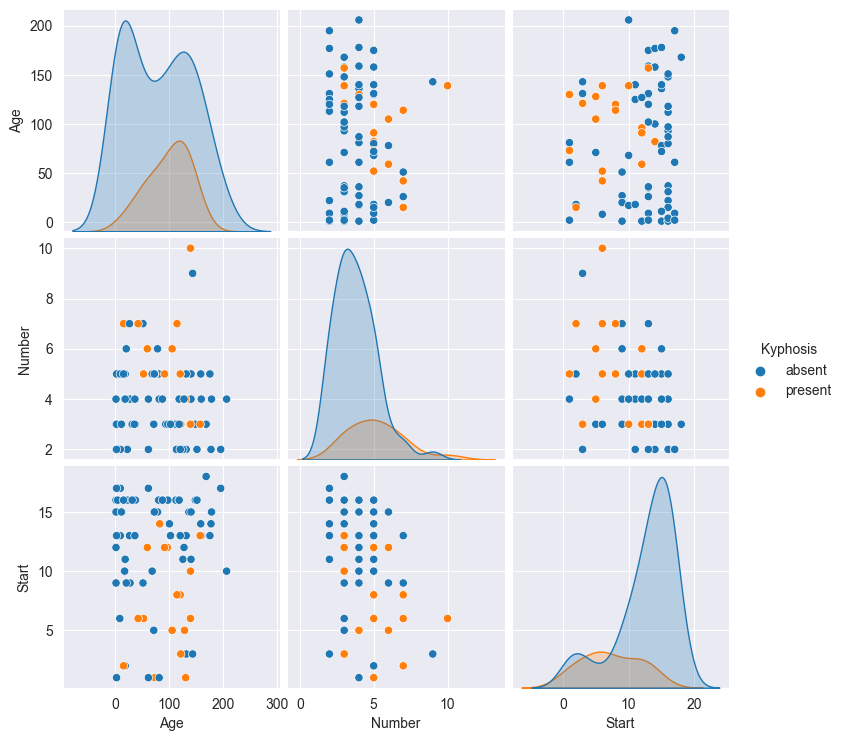

In [5]:
sns.pairplot(data=df, hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
predicted = dt.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

      absent       0.74      0.93      0.82        15
     present       0.83      0.50      0.62        10

    accuracy                           0.76        25
   macro avg       0.79      0.72      0.72        25
weighted avg       0.78      0.76      0.74        25



In [14]:
print(confusion_matrix(predicted, y_test))

[[14  1]
 [ 5  5]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(n_estimators=100)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
predicted = rf.predict(X_test)

In [19]:
print(classification_report(predicted, y_test), '\n', confusion_matrix(predicted, y_test))

              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        21
     present       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25
 
 [[18  3]
 [ 1  3]]


In [30]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot_ng

In [39]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [40]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot_ng.graph_from_dot_data(dot_data.getvalue())